## EXPERIMENT 2.1: MagFace

In [1]:
## Load libraries

import numpy as np
import cv2
from matplotlib import pyplot as plt
import torch
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import normalize
import sys
sns.set(style="white")
%matplotlib inline
sys.path.append('../../utils')
from Model_utils.Model_funcs import *
from Result_metric_utils.result_metrics import *
from Data_proc_utils.Data_proc_funcs import *
from DET_utils.DET_plots import *
from DET_utils.DET import *
from Plotting_stats_utils.plotting_threshold import *
from Plotting_stats_utils.stats_tables import *
from IPython import embed


### MagFace Results

This notebook loads the feature vectors from MagFace and run them through the results metrics:
FNIR, FPIR, FND, FPD, and GARBE.


This notebook prints the results for the exoeriment 2.1 where the MagFace model have been fine tuned on the HDA data set og children. 

# Load data

In [4]:
feature_list_children = '../../data/data_full/feature_vectors/magface_feature_vectors/2.1/NEW.pt'
feature_list_adults = '../../data/data_full/feature_vectors/magface_feature_vectors/2.1/NEW.pt'

def load_and_compute_similarity(feature_list, dtype=np.float32):
    # Load data
    image_names, ids, num_ids, norm_feats = load_magface_vectors(feature_list)

    # Convert dtype to reduce memory usage
    norm_feats = norm_feats.astype(dtype)

    # Compute similarity matrix incrementally if possible
    sim_mat = np.dot(norm_feats, norm_feats.T)

    return image_names, ids, num_ids, sim_mat


In [5]:
# Load and compute for children
image_names_c, ids_c, num_ids_c, sim_mat_c = load_and_compute_similarity(feature_list_children)


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 128: invalid start byte

In [ ]:

# Load and compute for adults
image_names_a, ids_a, num_ids_a, sim_mat_a = load_and_compute_similarity(feature_list_adults)


/data/data_full/adults_filtered_bibel_cropped_resized_retina/Indian_m.02nrz2/m.02nrz2_0003.jpg
/data/data_full/adults_filtered_bibel_cropped_resized_retina/Indian_m.02nrz2/m.02nrz2_0001.jpg
/data/data_full/adults_filtered_bibel_cropped_resized_retina/Indian_m.02nrz2/m.02nrz2_0004.jpg
/data/data_full/adults_filtered_bibel_cropped_resized_retina/Indian_m.01241v/m.01241v_0002.jpg
/data/data_full/adults_filtered_bibel_cropped_resized_retina/African_m.05zn751/m.05zn751_0001.jpg
/data/data_full/adults_filtered_bibel_cropped_resized_retina/African_m.05zn751/m.05zn751_0002.jpg
/data/data_full/adults_filtered_bibel_cropped_resized_retina/African_m.05zn751/m.05zn751_0004.jpg
/data/data_full/adults_filtered_bibel_cropped_resized_retina/Indian_m.04n3v0_/m.04n3v0__0001.jpg
/data/data_full/adults_filtered_bibel_cropped_resized_retina/Indian_m.0kvkdqp/m.0kvkdqp_0001.jpg
/data/data_full/adults_filtered_bibel_cropped_resized_retina/Indian_m.0kvkdqp/m.0kvkdqp_0004.jpg
/data/data_full/adults_filtered_bib

In [ ]:


# Dataframes with info, removes names not in magface results
children_all = pd.read_csv('../../data/image_info_csvs/final_filtered_children_df_BIBEL.csv')
children_all = children_all[children_all.image_name.isin(image_names_c)]

adults_all_org = pd.read_csv('../../data/image_info_csvs/final_filtered_adults_df_BIBEL.csv')
adults_all = adults_all_org[adults_all_org.image_name.isin(image_names_a)]

In [ ]:
her = 3
image_names_a[her], ids_a[her], num_ids_a[her]

('m.01241v_0002', 'm.01241v', 1)

# Find the threshold

In [6]:
random_states = [1,2]
percentiles = np.arange(0.1, 1, 0.008).tolist()

df_all_threshold_x = compute_metrics_ex_1_1(random_states, percentiles, children_all, adults_all, image_names_c, image_names_a, sim_mat_c, sim_mat_a, num_ids_c, num_ids_a, ids_c, ids_a, balance_child_data, balance_adults_data_enrolled, compute_fnir, compute_fpir, GARBE)


FPD result:  0.0
FND result:  0.32584838764139795
GARBE result, GARBE close to 1 means more unfair:  0.24438629073104845
Done for random_state: 1, percentile: 0.1
FPD result:  0.0
FND result:  0.32584838764139795
GARBE result, GARBE close to 1 means more unfair:  0.24438629073104845
Done for random_state: 1, percentile: 0.10800000000000001
FPD result:  0.0
FND result:  0.32584838764139795
GARBE result, GARBE close to 1 means more unfair:  0.24438629073104845
Done for random_state: 1, percentile: 0.11600000000000002
FPD result:  0.0
FND result:  0.32584838764139795
GARBE result, GARBE close to 1 means more unfair:  0.24438629073104845
Done for random_state: 1, percentile: 0.12400000000000003
FPD result:  0.0
FND result:  0.20335753828456393
GARBE result, GARBE close to 1 means more unfair:  0.15251815371342295
Done for random_state: 1, percentile: 0.13200000000000003
FPD result:  0.0
FND result:  0.13720030482443282
GARBE result, GARBE close to 1 means more unfair:  0.10290022861832462


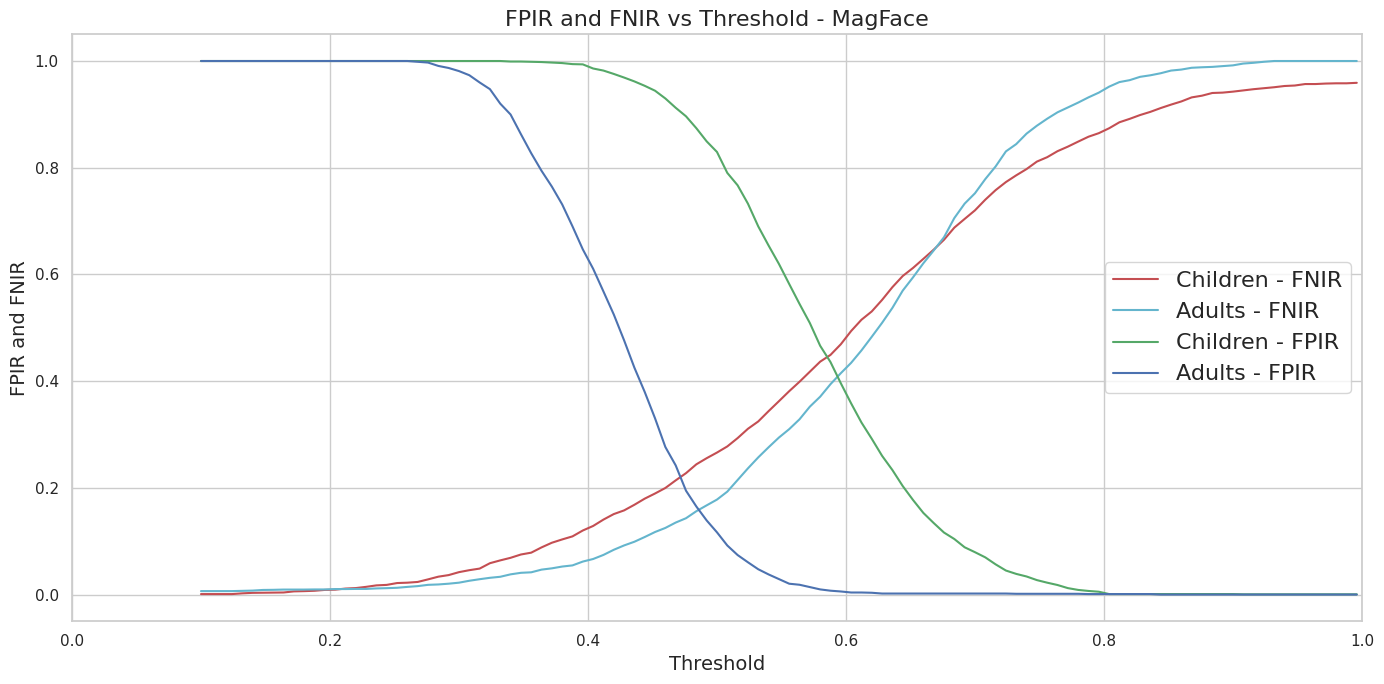

In [10]:

plot_threshold_metrics_ex_1_1_together(df_all_threshold_x)

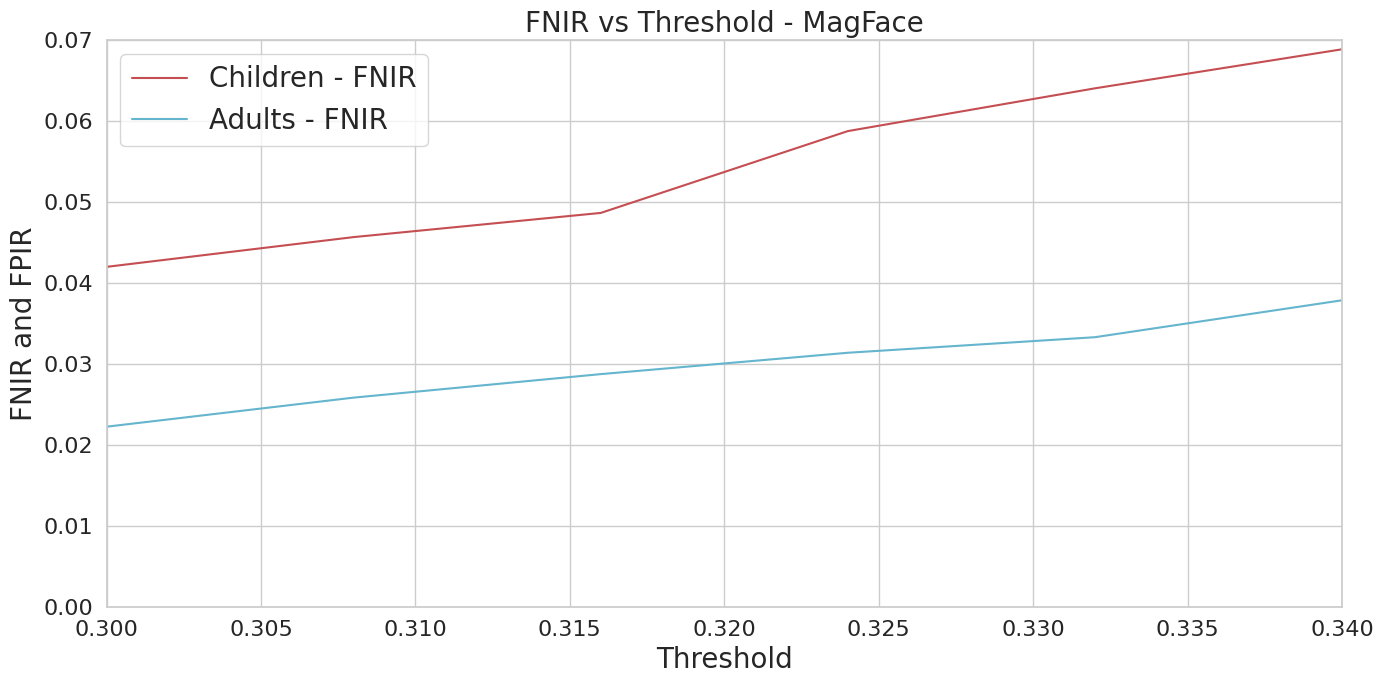

In [13]:
# plot_threshold_metrics_ex_1_1_zoomed(df_all_threshold_x)

### the threshold should be 0.317

# Stats - 10 experiments

In [14]:

random_states = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

df_all_results, sim_mat_dict_all_magface_ex1_1 = evaluate_metrics_ex_1_1(
    random_states, children_all, adults_all, image_names_c, image_names_a,
    sim_mat_c, sim_mat_a, num_ids_c, num_ids_a, ids_c, ids_a, balance_child_data,
    balance_adults_data_enrolled, compute_fnir, compute_fpir, GARBE, remove_ones, 0.317
)


FPD result:  0.27089604846426824
FND result:  0.12997411881316984
GARBE result, GARBE close to 1 means more unfair:  0.16520460122594444
done
FPD result:  0.27249926582894324
FND result:  0.14612494773562654
GARBE result, GARBE close to 1 means more unfair:  0.1777185272589557
done
FPD result:  0.2733628865504501
FND result:  0.14077102803738317
GARBE result, GARBE close to 1 means more unfair:  0.17391899266564992
done
FPD result:  0.19104647705335953
FND result:  0.1976143590405785
GARBE result, GARBE close to 1 means more unfair:  0.19597238854377375
done
FPD result:  0.2340089780793135
FND result:  0.22157476292346498
GARBE result, GARBE close to 1 means more unfair:  0.2246833167124271
done
FPD result:  0.20337235592143554
FND result:  0.09282823156617857
GARBE result, GARBE close to 1 means more unfair:  0.12046426265499281
done
FPD result:  0.25380005856519433
FND result:  0.09811738881408691
GARBE result, GARBE close to 1 means more unfair:  0.13703805625186377
done
FPD result:

In [15]:
df_all_results.applymap(lambda x: f"{x:.3f}")

/tmp/ipykernel_4809/2398388374.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_all_results.applymap(lambda x: f"{x:.3f}")


,Iteration,FNIR_c,FNIR_a,FPIR_c,FPIR_a,FPD,FND,GARBE,Threshold
0,1.000,0.056,0.033,1.000,0.952,0.271,0.130,0.165,0.317
1,2.000,0.045,0.025,1.000,0.962,0.272,0.146,0.178,0.317
2,3.000,0.045,0.025,1.000,0.962,0.273,0.141,0.174,0.317
3,4.000,0.054,0.024,1.000,0.970,0.191,0.198,0.196,0.317
4,5.000,0.057,0.022,1.000,0.963,0.234,0.222,0.225,0.317
5,6.000,0.050,0.034,1.000,0.966,0.203,0.093,0.120,0.317
6,7.000,0.042,0.028,1.000,0.964,0.254,0.098,0.137,0.317
7,8.000,0.048,0.021,1.000,0.960,0.289,0.200,0.222,0.317
8,9.000,0.046,0.020,1.000,0.965,0.267,0.196,0.214,0.317
9,10.000,0.052,0.027,1.000,0.960,0.252,0.159,0.182,0.317


In [16]:
df_all_results.describe().applymap(lambda x: f"{x:.3f}")


/tmp/ipykernel_4809/1142005554.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_all_results.describe().applymap(lambda x: f"{x:.3f}")


,Iteration,FNIR_c,FNIR_a,FPIR_c,FPIR_a,FPD,FND,GARBE,Threshold
count,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000
mean,5.500,0.050,0.026,1.000,0.962,0.251,0.158,0.181,0.317
std,3.028,0.005,0.005,0.000,0.005,0.032,0.045,0.035,0.000
min,1.000,0.042,0.020,1.000,0.952,0.191,0.093,0.120,0.317
25%,3.250,0.045,0.022,1.000,0.961,0.239,0.133,0.167,0.317
50%,5.500,0.049,0.025,1.000,0.963,0.260,0.152,0.180,0.317
75%,7.750,0.054,0.028,1.000,0.965,0.272,0.197,0.209,0.317
max,10.000,0.057,0.034,1.000,0.970,0.289,0.222,0.225,0.317


# Gemmer simscores

In [17]:
df_all_results.to_csv('results_10_experiment_2_1_magface.csv')

In [ ]:
import numpy as np
import pandas as pd

def concatenate_and_save_sim_matrices(sim_mat_dict, base_key, file_prefix, iterations=10):
    """
    Concatenates arrays from a dictionary and saves them as a CSV file.

    Parameters:
    - sim_mat_dict: Dictionary containing the arrays.
    - base_key: Base key name for accessing arrays in the dictionary.
    - file_prefix: Prefix for the output CSV file name.
    - iterations: Number of iterations to loop through (default is 10).
    """
    # List to hold all the arrays
    sim_mat_iterations = []

    # Loop to access each array and append it to the list
    for i in range(1, iterations + 1):
        key = f'{base_key}_{i}'
        if key in sim_mat_dict:
            sim_mat_iterations.append(sim_mat_dict[key])

    # Concatenate all arrays into one big array
    sim_mat_iterations_all = np.concatenate(sim_mat_iterations)
    sim_mat_iterations_all = pd.DataFrame(sim_mat_iterations_all)

    # Save the big array to a CSV file
    output_filename = f'{file_prefix}_iterations_all.csv'
    sim_mat_iterations_all.to_csv(output_filename, index=False)

    # Print the length of the big array
    print(len(sim_mat_iterations_all))



# Call the function for each set of keys
concatenate_and_save_sim_matrices(sim_mat_dict_all_magface_ex2_1, 'sim_mat_c_enrolled_iteration', 'sim_mat_c_enrolled')
concatenate_and_save_sim_matrices(sim_mat_dict_all_magface_ex2_1, 'sim_mat_a_enrolled_iteration', 'sim_mat_a_enrolled')
concatenate_and_save_sim_matrices(sim_mat_dict_all_magface_ex2_1, 'sim_mat_c_non_enrolled_iteration', 'sim_mat_c_non_enrolled')
concatenate_and_save_sim_matrices(sim_mat_dict_all_magface_ex2_1, 'sim_mat_a_non_enrolled_iteration', 'sim_mat_a_non_enrolled')


In [18]:
# # Add together all

# # make one  big array out of all arays named f'sim_mat_dict_all_magface_ex1_1['sim_mat_c_enrolled_iteration_{i}']' for i from 1 to 10
# # List to hold all the arrays
# sim_mat_c_enrolled_iterations = []

# # Loop to access each array and append it to the list
# for i in range(1, 11):
#     key = f'sim_mat_c_enrolled_iteration_{i}'
#     if key in sim_mat_dict_all_magface_ex1_1:
#         sim_mat_c_enrolled_iterations.append(sim_mat_dict_all_magface_ex1_1[key])

# # Concatenate all arrays into one big array
# sim_mat_c_enrolled_iterations_all = np.concatenate(sim_mat_c_enrolled_iterations)
# sim_mat_c_enrolled_iterations_all = pd.DataFrame(sim_mat_c_enrolled_iterations_all)
# sim_mat_c_enrolled_iterations_all.to_csv('sim_mat_c_enrolled_iterations_all.csv', index=False)
# # Print the big array
# print(len(sim_mat_c_enrolled_iterations_all))



# # Add together all

# # make one  big array out of all arays named f'sim_mat_dict_all_magface_ex1_1['sim_mat_c_enrolled_iteration_{i}']' for i from 1 to 10

# # List to hold all the arrays
# sim_mat_a_enrolled_iterations = []

# # Loop to access each array and append it to the list
# for i in range(1, 11):
#     key = f'sim_mat_a_enrolled_iteration_{i}'
#     if key in sim_mat_dict_all_magface_ex1_1:
#         sim_mat_a_enrolled_iterations.append(sim_mat_dict_all_magface_ex1_1[key])

# # Concatenate all arrays into one big array
# sim_mat_a_enrolled_iterations_all = np.concatenate(sim_mat_a_enrolled_iterations)
# sim_mat_a_enrolled_iterations_all = pd.DataFrame(sim_mat_a_enrolled_iterations_all)
# sim_mat_a_enrolled_iterations_all.to_csv('sim_mat_a_enrolled_iterations_all.csv', index=False)


# # Print the big array
# print(len(sim_mat_a_enrolled_iterations_all))

# # Add together all

# # make one  big array out of all arays named f'sim_mat_dict_all_magface_ex1_1['sim_mat_c_enrolled_iteration_{i}']' for i from 1 to 10

# # List to hold all the arrays
# sim_mat_c_non_enrolled_iterations = []

# # Loop to access each array and append it to the list
# for i in range(1, 11):
#     key = f'sim_mat_c_non_enrolled_iteration_{i}'
#     if key in sim_mat_dict_all_magface_ex1_1:
#         sim_mat_c_non_enrolled_iterations.append(sim_mat_dict_all_magface_ex1_1[key])

# sim_mat_c_non_enrolled_iterations_all = np.concatenate(sim_mat_c_non_enrolled_iterations)
# sim_mat_c_non_enrolled_iterations_all = pd.DataFrame(sim_mat_c_non_enrolled_iterations_all)
# sim_mat_c_non_enrolled_iterations_all.to_csv('sim_mat_c_non_enrolled_iterations_all.csv', index=False)
# # Print the big array
# print(len(sim_mat_c_non_enrolled_iterations_all))


# # Add together all

# # make one  big array out of all arays named f'sim_mat_dict_all_magface_ex1_1['sim_mat_c_enrolled_iteration_{i}']' for i from 1 to 10

# # List to hold all the arrays
# sim_mat_a_non_enrolled_iterations = []

# # Loop to access each array and append it to the list
# for i in range(1, 11):
#     key = f'sim_mat_a_non_enrolled_iteration_{i}'
#     if key in sim_mat_dict_all_magface_ex1_1:
#         sim_mat_a_non_enrolled_iterations.append(sim_mat_dict_all_magface_ex1_1[key])

# sim_mat_a_non_enrolled_iterations_all = np.concatenate(sim_mat_a_non_enrolled_iterations)
# sim_mat_a_non_enrolled_iterations_all = pd.DataFrame(sim_mat_a_non_enrolled_iterations_all)
# sim_mat_a_non_enrolled_iterations_all.to_csv('sim_mat_a_non_enrolled_iterations_all.csv', index=False)

# # Print the big array
# print(len(sim_mat_a_non_enrolled_iterations_all))


147642
41438


32751054
32371232


# Loading pre-saved stuff

In [2]:
sim_mat_c_enrolled_iterations_all = (pd.read_csv('sim_mat_c_enrolled_iterations_all.csv')).values.flatten()
sim_mat_a_enrolled_iterations_all = (pd.read_csv('sim_mat_a_enrolled_iterations_all.csv')).values.flatten()
sim_mat_c_non_enrolled_iterations_all = (pd.read_csv('sim_mat_c_non_enrolled_iterations_all.csv')).values.flatten()
sim_mat_a_non_enrolled_iterations_all = (pd.read_csv('sim_mat_a_non_enrolled_iterations_all.csv')).values.flatten()


In [3]:
from scipy.stats import describe, gaussian_kde
import math

def descriptive_statistics(mated_scores, nonmated_scores):
    stats_labels = ["Observations", "Minimum", "Maximum", "Mean", "St. Dev.", "Skewness", "Ex. Kurtosis"]
    mated_stats = describe(mated_scores)
    mated_stats = [mated_stats.nobs, mated_stats.minmax[0], mated_stats.minmax[1], mated_stats.mean, math.sqrt(mated_stats.variance), mated_stats.skewness, mated_stats.kurtosis]
    nonmated_stats = describe(nonmated_scores)
    nonmated_stats = [nonmated_stats.nobs, nonmated_stats.minmax[0], nonmated_stats.minmax[1], nonmated_stats.mean, math.sqrt(nonmated_stats.variance), nonmated_stats.skewness, nonmated_stats.kurtosis]

    stats_system_df = pd.DataFrame(np.array([stats_labels, mated_stats, nonmated_stats]).T, columns=["Statistic", "Mated", "Non-mated"])
    stats_system_df = stats_system_df.astype({"Statistic": str, "Mated": float, "Non-mated": float})
    return stats_system_df

In [4]:
mated_scores1 = sim_mat_a_enrolled_iterations_all
nonmated_scores1 = sim_mat_a_non_enrolled_iterations_all
scores_type1 = "similarity"
stats_system1_df = descriptive_statistics(mated_scores1, nonmated_scores1)
display(stats_system1_df)

,Statistic,Mated,Non-mated
0,Observations,41438.000000,3.237123e+07
1,Minimum,-0.080124,-4.764143e-01
2,Maximum,0.961255,9.116261e-01
3,Mean,0.639951,2.735116e-02
4,St. Dev.,0.127537,1.062149e-01
5,Skewness,-0.913665,2.954242e-01
6,Ex. Kurtosis,2.531520,3.267751e-01


In [5]:
mated_scores2 = sim_mat_c_enrolled_iterations_all
nonmated_scores2 = sim_mat_c_non_enrolled_iterations_all
scores_type2 = "similarity"
stats_system2_df = descriptive_statistics(mated_scores2, nonmated_scores2)
display(stats_system2_df)

,Statistic,Mated,Non-mated
0,Observations,147642.000000,3.275105e+07
1,Minimum,-0.032878,-3.634797e-01
2,Maximum,0.996554,9.998633e-01
3,Mean,0.622536,1.738071e-01
4,St. Dev.,0.147768,1.328158e-01
5,Skewness,-0.478645,2.500852e-01
6,Ex. Kurtosis,0.241791,1.722764e-02


In [6]:
mated_colour = "green"
mated_label = "Mated scores"
nonmated_colour = "red"
nonmated_label = "Non-mated scores"

figure_size = (12,6)
alpha_shade = 0.25
alpha_fill = 1.0
linewidth = 2
legend_loc = "upper left"
legend_anchor = (1.0, 1.02)
legend_cols = 1
legend_fontsize = 16
label_fontsize = 20

threshold_colour = "black"
threshold_style = "--"
round_digits = 5
sns.set(style="white", palette="muted", color_codes=True)
plt.rc("axes", axisbelow=True)

In [12]:

import matplotlib.pyplot as plt
import numpy as np

def plot_histogram(mated_scores, nonmated_scores, normalise=True, savename=None, title="Histogram"):
    def normalise_scores(distribution):
        return np.ones_like(distribution) / len(distribution)

    mated_mean = np.mean(mated_scores)

    plt.figure(figsize=(10, 6))  # Replace 'figure_size' with a specific size if not defined

    if normalise:
        plt.hist(mated_scores, bins=50, weights=normalise_scores(mated_scores), color='green', alpha=0.5, label='Mated Scores')  # Replace 'mated_label' with 'Mated Scores'
        plt.hist(nonmated_scores, bins=30, weights=normalise_scores(nonmated_scores), color='red', alpha=0.5, label='Non-mated Scores')  # Replace 'nonmated_label' with 'Non-mated Scores'
        ylabel = "Probability Density"
    else:
        plt.hist(mated_scores, bins=50, color='green', alpha=0.5, label='Mated Scores')
        plt.hist(nonmated_scores, bins=30, color='red', alpha=0.5, label='Non-mated Scores')
        ylabel = "Count"

    plt.axvline(mated_mean, color='darkgreen', linestyle='--', linewidth=2, label=f'Mated Mean: {mated_mean:.2f}')

    plt.xlabel("Comparison Score", size=16)
    plt.ylabel(ylabel, size=16)
    plt.title(title, size=20)
    plt.grid(True)
    plt.legend(loc='upper right', bbox_to_anchor=(1, 1), ncol=1, fontsize=14)  # Adjust legend parameters as needed

    if savename is not None:
        plt.savefig(savename, bbox_inches="tight")
        plt.cla()
        plt.clf()
        plt.close()
    else:
        plt.show()


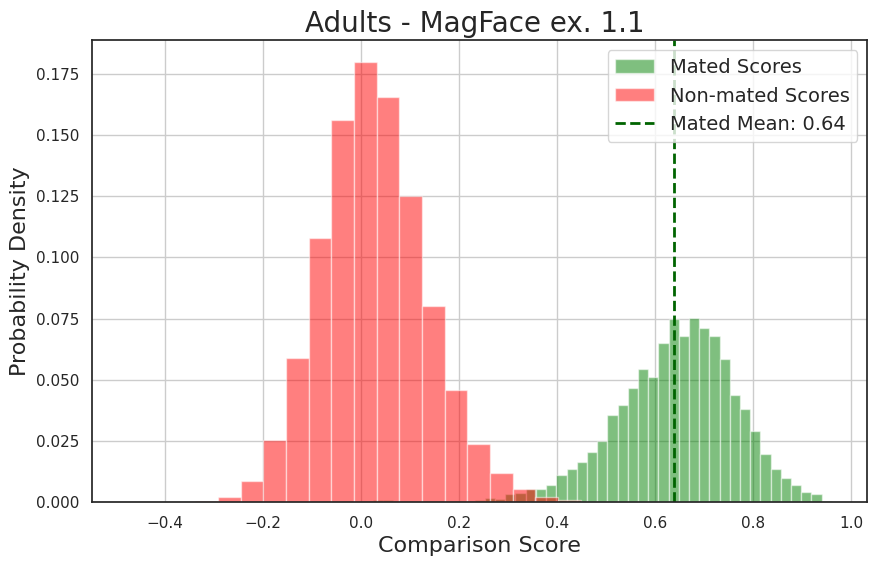

In [13]:

plot_histogram(mated_scores1, nonmated_scores1, normalise=True, title = 'Adults - MagFace ex. 1.1 ')


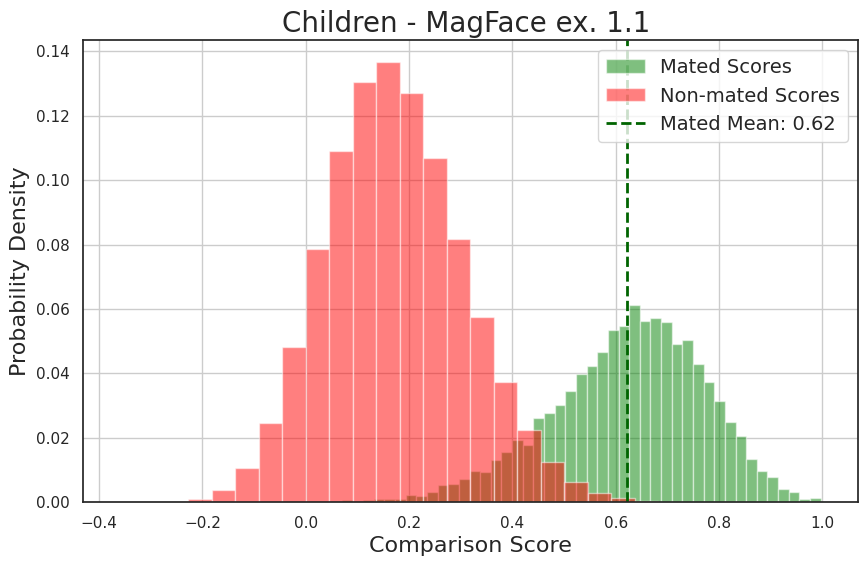

In [15]:
plot_histogram(mated_scores2, nonmated_scores2, normalise=True, title = 'Children - MagFace ex. 1.1 ')


# DET curves

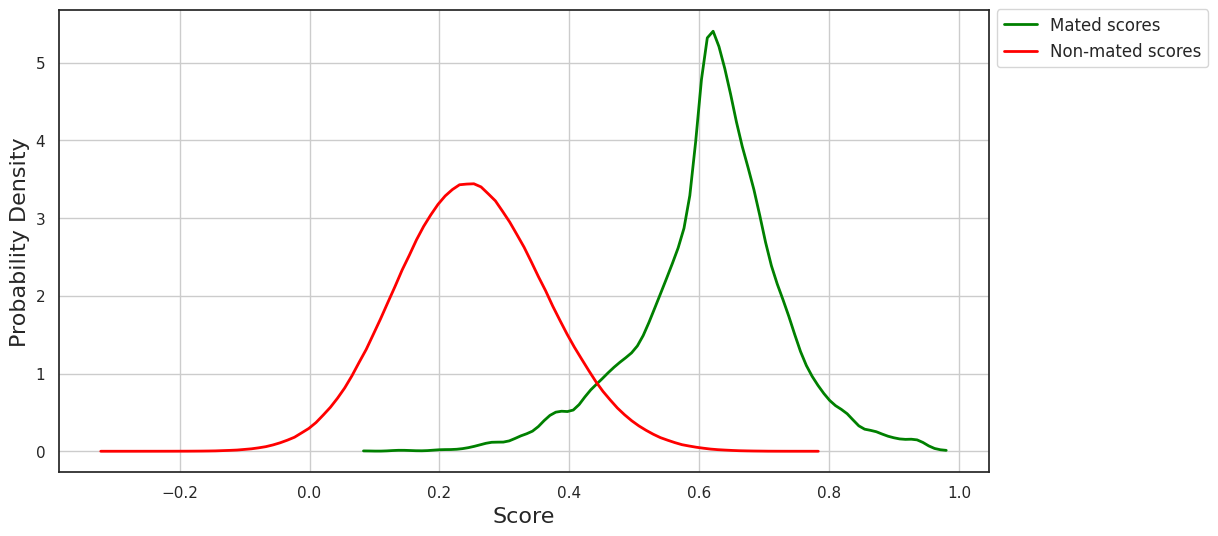

In [10]:
# mated_kde, mated_pos, mated_min, mated_max = get_kde(mated_scores1)
# nonmated_kde, nonmated_pos, nonmated_min, nonmated_max = get_kde(nonmated_scores1)
# plt.figure(figsize=figure_size)
# plt.plot(mated_pos, mated_kde(mated_pos), linewidth=linewidth, color=mated_colour, label=mated_label)
# plt.plot(nonmated_pos, nonmated_kde(nonmated_pos), linewidth=linewidth, color=nonmated_colour, label=nonmated_label)
# plt.xlabel("Score", size=label_fontsize)
# plt.ylabel("Probability Density", size=label_fontsize)
# plt.grid(True)
# plt.legend(loc=legend_loc, bbox_to_anchor=legend_anchor, ncol=legend_cols, fontsize=legend_fontsize)
# plt.show()

In [35]:
d_prime_system1 = d_prime(mated_scores1, nonmated_scores1)
print("d' child =", round(d_prime_system1, round_digits))

d_prime_system2 = d_prime(mated_scores2, nonmated_scores2)
print("d' adult =", round(d_prime_system2, round_digits))

# d_prime_system3 = d_prime(mated_scores3, nonmated_scores3)
# print("d' canonical =", round(d_prime_system3, round_digits))


d' child = 5.21982
d' adult = 3.194


In [15]:
figure_size = (12,7)
alpha_shade = 0.25
alpha_fill = 1.0
linewidth = 2
legend_loc = "upper left"
legend_anchor = (1.0, 1.02)
legend_cols = 1
legend_fontsize = 18
label_fontsize = 18
tick_fontsize = 18

def kde_with_threshold(mated_scores, nonmated_scores, scores_type, threshold, savename=None):
    linspace_items = 101
    mated_kde, mated_pos, mated_min, mated_max = get_kde(mated_scores, linspace_items)
    nonmated_kde, nonmated_pos, nonmated_min, nonmated_max = get_kde(nonmated_scores, linspace_items)

    plt.figure(figsize=figure_size)
    plt.xlabel("Comparison Score", size=label_fontsize)
    plt.ylabel("Probability Density", size=label_fontsize)

    def compute_fills(scores_type, mated_min, mated_max, nonmated_min, nonmated_max, linspace_items):
        if scores_type == "similarity":
            if mated_min < threshold:
                mated_shade = np.linspace(threshold, mated_max, linspace_items)
                mated_fill = np.linspace(mated_min, threshold, linspace_items)
            else:
                mated_shade = np.linspace(mated_min, mated_max, linspace_items)
                mated_fill = None
            if nonmated_max > threshold:
                nonmated_shade = np.linspace(nonmated_min, threshold, linspace_items)
                nonmated_fill = np.linspace(threshold, nonmated_max, linspace_items)
            else:
                nonmated_shade = np.linspace(nonmated_min, nonmated_max, linspace_items)
                nonmated_fill = None
        elif scores_type == "dissimilarity":
            if mated_max > threshold:
                mated_shade = np.linspace(mated_min, threshold, linspace_items)
                mated_fill = np.linspace(threshold, mated_max, linspace_items)
            else:
                mated_shade = np.linspace(mated_min, mated_max, linspace_items)
                mated_fill = None
            if nonmated_min < threshold:
                nonmated_shade = np.linspace(threshold, nonmated_max, linspace_items)
                nonmated_fill = np.linspace(nonmated_min, threshold, linspace_items)
            else:
                nonmated_shade = np.linspace(nonmated_min, nonmated_max, linspace_items)
                nonmated_fill = None
        else:
            raise ValueError(f"Unknown type of comparison scores: {scores_type}")
        return mated_shade, mated_fill, nonmated_shade, nonmated_fill

    plt.plot(mated_pos, mated_kde(mated_pos), linewidth=linewidth, color=mated_colour, label=mated_label)
    plt.plot(nonmated_pos, nonmated_kde(nonmated_pos), linewidth=linewidth, color=nonmated_colour, label=nonmated_label)

    mated_shade, mated_fill, nonmated_shade, nonmated_fill = compute_fills(scores_type, mated_min, mated_max, nonmated_min, nonmated_max, linspace_items)

    plt.fill_between(mated_shade, mated_kde(mated_shade), alpha=alpha_shade, color=mated_colour)
    plt.fill_between(nonmated_shade, nonmated_kde(nonmated_shade), alpha=alpha_shade, color=nonmated_colour)

    if mated_fill is not None:
        plt.fill_between(mated_fill, mated_kde(mated_fill), alpha=alpha_fill, color=mated_colour)
    if nonmated_fill is not None:
        plt.fill_between(nonmated_fill, nonmated_kde(nonmated_fill), alpha=alpha_fill, color=nonmated_colour)

    plt.axvline(threshold, linewidth=linewidth, linestyle=threshold_style, color=threshold_colour, label="Decision th")

    plt.legend(loc=0)
    red_patch = mpatches.Patch(color=nonmated_colour, alpha=alpha_fill, label='False positives')
    green_patch = mpatches.Patch(color=mated_colour, alpha=alpha_fill, label='False negatives')
    shaded_red_patch = mpatches.Patch(color=nonmated_colour, alpha=alpha_shade, label='True negatives')
    shaded_green_patch = mpatches.Patch(color=mated_colour, alpha=alpha_shade, label='True positives')
    current_handles, _ = plt.gca().get_legend_handles_labels()

    plt.grid(True)
    plt.legend(loc='upper right', bbox_to_anchor=legend_anchor, ncol=legend_cols, fontsize=legend_fontsize, handles=[green_patch, red_patch, shaded_green_patch, shaded_red_patch]+current_handles)
    plt.xlim(-0.1, 1)
    plt.ylim(0, None)
    plt.xticks(fontsize=tick_fontsize)
    plt.yticks(fontsize=tick_fontsize)

    if savename is not None:
        plt.savefig(savename, bbox_inches="tight")
        plt.cla()
        plt.clf()
        plt.close()
    else:
        plt.show()


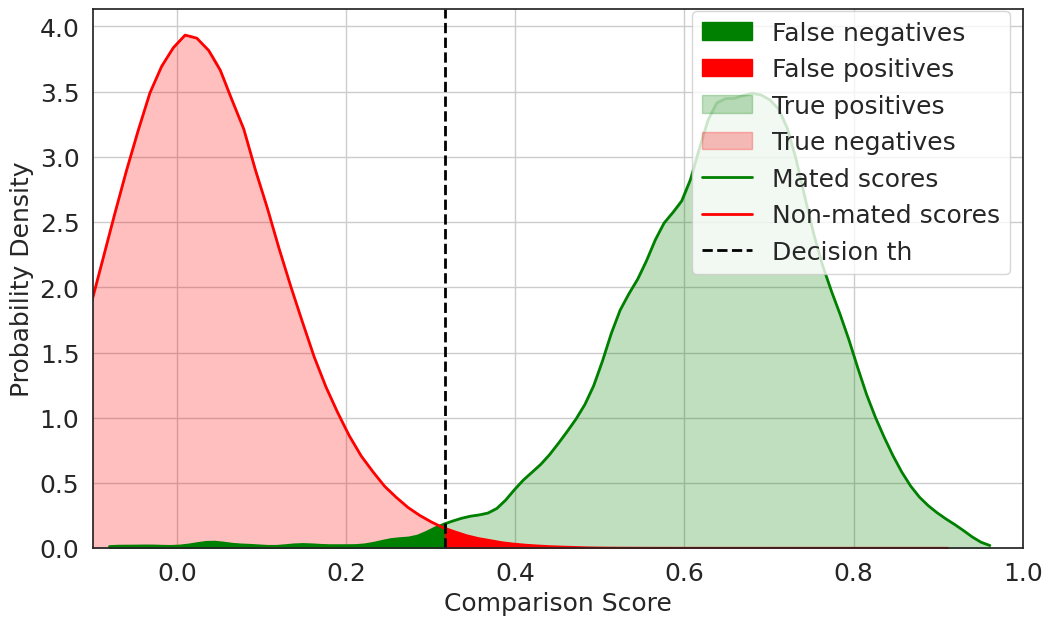

In [16]:
threshold1 = 0.317
kde_with_threshold(mated_scores1, nonmated_scores1, scores_type1, threshold1)

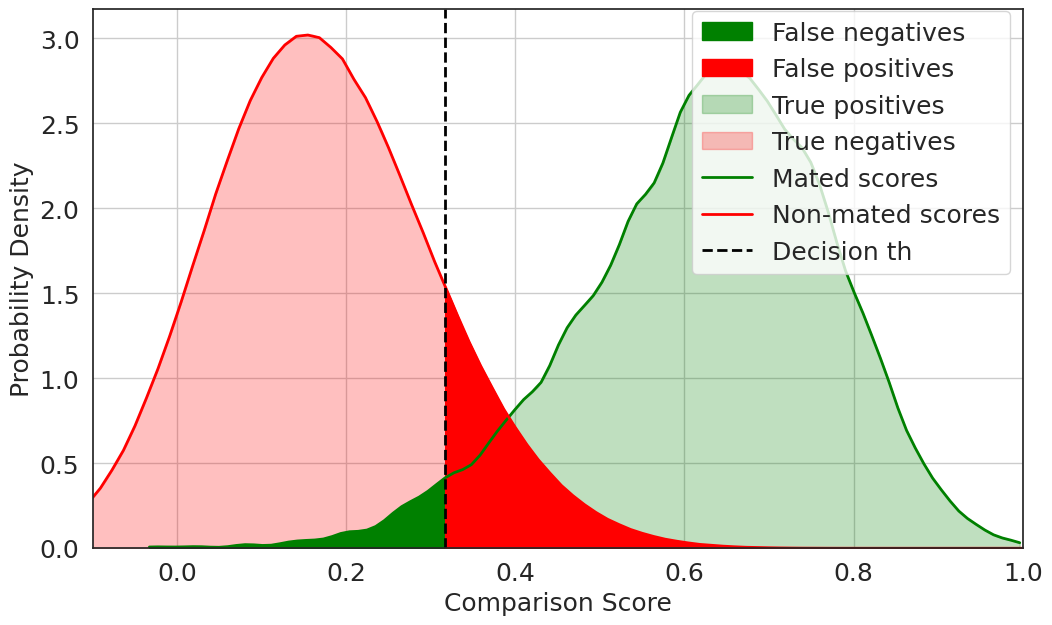

In [17]:
threshold2 = 0.317
kde_with_threshold(mated_scores2, nonmated_scores2, scores_type2, threshold2)

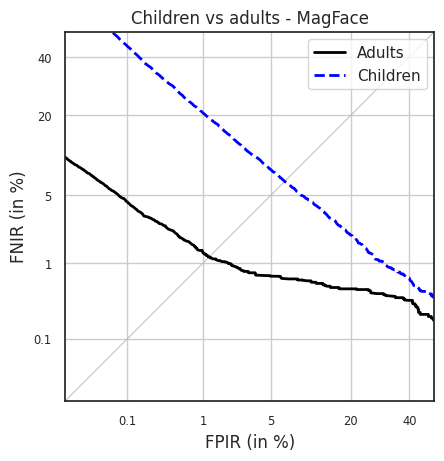

In [7]:
system_name1 = 'Adults'
system_name2 = 'Children'

det = DET(biometric_evaluation_type='identification', abbreviate_axes=True, plot_eer_line=True, plot_title="Children vs adults - MagFace")
det.x_limits = np.array([1e-4, .5])
det.y_limits = np.array([1e-4, .5])
det.x_ticks = np.array([1e-3, 1e-2, 5e-2, 20e-2, 40e-2])
det.x_ticklabels = np.array(['0.1', '1', '5', '20', '40'])
det.y_ticks = np.array([1e-3, 1e-2, 5e-2, 20e-2, 40e-2])
det.y_ticklabels = np.array(['0.1', '1', '5', '20', '40'])
det.create_figure()
det.plot(tar=adjust_scores_for_DET(mated_scores1, scores_type1), non=adjust_scores_for_DET(nonmated_scores1, scores_type1), label=system_name1)
det.plot(tar=adjust_scores_for_DET(mated_scores2, scores_type2), non=adjust_scores_for_DET(nonmated_scores2, scores_type2), label=system_name2)
det.legend_on(loc="upper right")
det.xticks(fontsize=tick_fontsize)
det.yticks(fontsize=tick_fontsize)
det.show()

In [ ]:
import numpy as np
from scipy.integrate import simps
import matplotlib.pyplot as plt

def calculate_auc(tar, non, axes_transform, dissimilarity_scores=False):
    """
    Calculate the Area Under the Curve (AUC) for the DET plot.

    :param tar: Target scores (true positives)
    :param non: Non-target scores (false positives)
    :param axes_transform: Function to transform axes
    :param dissimilarity_scores: Boolean indicating if the scores are dissimilarity scores
    :return: AUC value
    """
    if dissimilarity_scores:
        tar = -np.array(tar)
        non = -np.array(non)

    # Compute ROC-like points
    fpr, tpr = compute_roc(tar, non)
    fpr, tpr = filter_roc(fpr, tpr)

    # Transform to linear scale for integration
    fpr_linear = axes_transform(fpr)
    tpr_linear = axes_transform(tpr)

    # Use the trapezoidal rule to integrate the curve
    auc = simps(tpr_linear, fpr_linear)

    return auc

def compute_roc(tar, non):
    """
    Compute ROC-like points.

    :param tar: Target scores (true positives)
    :param non: Non-target scores (false positives)
    :return: FPR and TPR
    """
    num_tar = len(tar)
    num_non = len(non)
    thresholds = np.unique(np.concatenate((tar, non)))
    fpr = np.array([(non >= t).mean() for t in thresholds])
    tpr = np.array([(tar >= t).mean() for t in thresholds])
    return fpr, tpr

def filter_roc(fpr, tpr):
    """
    Filter the ROC points to make it steppy for DET plot.

    :param fpr: False Positive Rate
    :param tpr: True Positive Rate
    :return: Filtered FPR and TPR
    """
    unique_fpr, indices = np.unique(fpr, return_index=True)
    unique_tpr = tpr[indices]
    return unique_fpr, unique_tpr

def probit(p):
    """
    Probit function for transforming axes.
    """
    return np.sqrt(2) * scipy.special.erfinv(2 * p - 1)



auc1 = calculate_auc(mated_scores1, nonmated_scores1, probit)
auc2 = calculate_auc(mated_scores2, nonmated_scores2, probit)

print(f"AUC for Adults: {auc1}")
print(f"AUC for Children: {auc2}")
